<a href="https://colab.research.google.com/github/ShreeShreeRavi/Sentiment-analysis/blob/main/Sentiment_analysis_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Load the IMDb dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to a fixed length
max_sequence_length = 200
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert integer sequences back to text
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
X_train_text = [' '.join([reverse_word_index.get(i - 3, '?') for i in sequence]) for sequence in X_train]
X_val_text = [' '.join([reverse_word_index.get(i - 3, '?') for i in sequence]) for sequence in X_val]

# Create and fit the Tokenizer
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train_text)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Create a TensorBoard callback and specify a log directory
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model and include the TensorBoard callback
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[tensorboard_callback])

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

# Make predictions on new data
new_texts = ["This movie is Terrible", "I liked it."]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length)
predictions = model.predict(new_sequences)
for i, text in enumerate(new_texts):
    sentiment = "positive" if predictions[i] > 0.5 else "negative"
    print(f'Text: "{text}" - Sentiment: {sentiment}')


1641221/1641221 [==============================] - 0s 0us/step
Epoch 1/10
625/625 [==============================] - 65s 92ms/step - loss: 0.4226 - accuracy: 0.8076 - val_loss: 0.3717 - val_accuracy: 0.8392
Epoch 2/10
625/625 [==============================] - 19s 30ms/step - loss: 0.2601 - accuracy: 0.8960 - val_loss: 0.3313 - val_accuracy: 0.8670
Epoch 3/10
625/625 [==============================] - 13s 21ms/step - loss: 0.2134 - accuracy: 0.9183 - val_loss: 0.4042 - val_accuracy: 0.8336
Epoch 4/10
625/625 [==============================] - 10s 17ms/step - loss: 0.1646 - accuracy: 0.9377 - val_loss: 0.4336 - val_accuracy: 0.8402
Epoch 5/10
625/625 [==============================] - 10s 15ms/step - loss: 0.1102 - accuracy: 0.9618 - val_loss: 0.4468 - val_accuracy: 0.8436
Epoch 6/10
625/625 [==============================] - 8s 13ms/step - loss: 0.0871 - accuracy: 0.9693 - val_loss: 0.5445 - val_accuracy: 0.8388
Epoch 7/10
625/625 [==============================] - 9s 14ms/step - loss:

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
625/625 [==============================] - 7s 11ms/step - loss: 3.6750e-05 - accuracy: 1.0000 - val_loss: 1.1228 - val_accuracy: 0.8550
Epoch 2/10
625/625 [==============================] - 7s 12ms/step - loss: 2.4282e-05 - accuracy: 1.0000 - val_loss: 1.1596 - val_accuracy: 0.8558
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 1.6518e-05 - accuracy: 1.0000 - val_loss: 1.1961 - val_accuracy: 0.8564
Epoch 4/10
625/625 [==============================] - 10s 17ms/step - loss: 1.1484e-05 - accuracy: 1.0000 - val_loss: 1.2317 - val_accuracy: 0.8560
Epoch 5/10
625/625 [==============================] - 7s 11ms/step - loss: 8.0753e-06 - accuracy: 1.0000 - val_loss: 1.2683 - val_accuracy: 0.8552
Epoch 6/10
625/625 [==============================] - 7s 11ms/step - loss: 5.6726e-06 - accuracy: 1.0000 - val_loss: 1.3036 - val_accuracy: 0.8554
Epoch 7/10
625/625 [==============================] - 7s 11ms/step - loss: 3.9800e-06 - accuracy: 1.0000 - val_loss: 

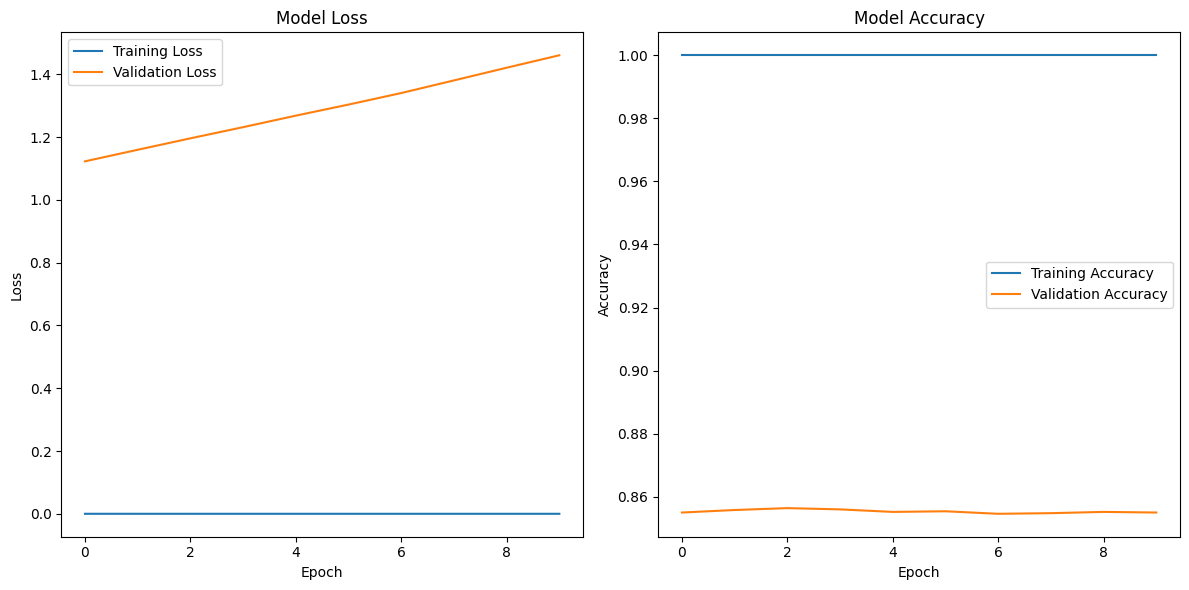

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
